# PA 3: Association Analysis - Apriori Algorithm

## Student Details
Student Name and ID:  Sai Rohith Pasala; 1001873156  <----- Only this student will submit the assignment

Student Name and ID:  Sri Naga Venkata Pavan Kalyan Sirigibattula; 1001886149

Student Name and ID:  Rutvik Naga Sai Dondapati; 1001879177


Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
return false;
}


<IPython.core.display.Javascript object>

### Task 1: DataSet Preprocess

Before you start you need to modify your dataset 'dataset_group.csv' to look like the toyDS.csv.
Each transaction is at one line with a variable length. Discard the date attribute (1st attribute) from your dataset. For example, in your dataset transaction#4 should look like:

cereals,juice,lunch meat,soda,toilet paper,all-purpose

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.

In [2]:
#importing the important libraries
import pandas as pd
import numpy as np
import csv


In [3]:
market_dataframe = pd.read_csv("Market_Basket_Optimisation.csv", encoding='latin1', sep='delimiter', header=None, engine='python')#syntax to import the dtaset csv file
market_dataframe = market_dataframe[0].str.split(",", expand = True) 
market_dataframe.head(7)#dislpaying the head of dataset imported

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,low fat yogurt,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,whole wheat pasta,french fries,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [4]:
#knowing the dimension of the dataset
market_dataframe.shape

(7501, 20)

In [5]:
#syntax to print first 5 entries
market_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [6]:
#syntax to print last 5 entries
market_dataframe.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7498,chicken,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7499,escalope,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [7]:
#checking the dataset randomly just in case
market_dataframe.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7092,herb & pepper,salmon,eggs,french fries,strawberries,candy bars,None,None,None,None,None,None,None,None,None,None,None,None,None,None
132,chocolate,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3044,whole wheat rice,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1839,mineral water,french fries,cookies,shallot,low fat yogurt,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7401,tomatoes,mineral water,eggs,chicken,extra dark chocolate,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6428,champagne,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1571,burgers,chocolate,herb & pepper,ground beef,spaghetti,soup,milk,chicken,muffins,low fat yogurt,None,None,None,None,None,None,None,None,None,None
6055,whole weat flour,brownies,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6467,herb & pepper,mineral water,eggs,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5556,cake,french fries,energy drink,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [8]:
#checking the properties of the dataset
market_dataframe.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,antioxydant juice,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


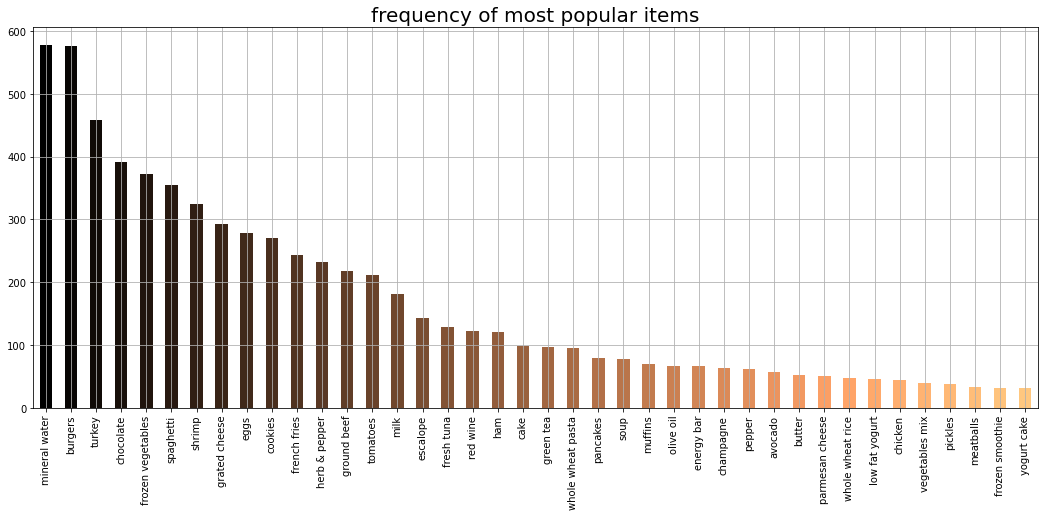

In [9]:
#Sample visualization to see the dataset in bar Graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
market_dataframe[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

### Task 2: Run apriory.py and Evaluate Results
In this task, you have to find how you will be able to execute and print apriory results by making use only the apriory.py. In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!".

(*) For those that are not familiar with python and coding this could be a quite demanding task.

You will have to execute apriori algorithm "3" times for different combinations of support and confidence. Print the results of apriory for 'dataset.csv' by making use ONLY the provided methods.

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way.
 
You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments.


In [10]:

print ('======================== Code for Task 2, Case:1 ===========================') 
print('***********************************************************************************************************')
print('After observing the support values of each item in the given dataset, I came to an understanding that most of the items support range is from 0.02 to 0.238 and if the min-support exceeds 23.8 percent then none of the items will be\nconsidered as frequent set item and no rules will generated. So, to avoid this case we have considered the support values  which are less than 23.8 percent as minimum support.')
print('***********************************************************************************************************')

print ('Case 1 (minimum support=0.01 and minimum confidence=0.2)\n')
print ('Case 1 Reasoning:\nThe rules must have greater confidence and confidence value > support value. \nIn this, minimum support is chosen as 1% and minimum confidence is chosen as 20%.\nMinimum support is 1% because when we consider lower values the transaction frequency is almost same,and 1% gave more valid itemset.\nThe confidence is 20% which means that, if one element of the item set is already in the basket, there is 20% chance that other item set is also added to the basket.\nThe greater value of minimum confidence than 20% is not chosen to avoid the uncertainity of the data.\nThe number of rules generated is less(217 rules) because from the obtained item set(X), only 217 X->Y can be identified such that P(Y|X)= 20%.\n')
#syntax to run the given dataset which is preprocessed agianst apriori.py file
%run apriori.py -f Market_Basket_Optimisation.csv -s 0.01 -c 0.2

======================== Code for Task 2, Case:1 ===========================
***********************************************************************************************************
After observing the support values of each item in the given dataset, I came to an understanding that most of the items support range is from 0.02 to 0.238 and if the min-support exceeds 23.8 percent then none of the items will be
considered as frequent set item and no rules will generated. So, to avoid this case we have considered the support values  which are less than 23.8 percent as minimum support.
***********************************************************************************************************
Case 1 (minimum support=0.01 and minimum confidence=0.2)

Case 1 Reasoning:
The rules must have greater confidence and confidence value > support value. 
In this, minimum support is chosen as 1% and minimum confidence is chosen as 20%.
Minimum support is 1% because when we consider lower values the 

In [11]:
print ('======================== Code for Task 2, Case:2 ===========================')

print ('Case 2 (minimum support=0.05 and minimum confidence=0.3)\n') 
print ('Case 2 Reasoning:\nIn this, minimum support value is increased and minimum confidence is increased.\n As the minimum support is increased, the chance of more elements of a item set being selected for basket is improved.\n As the minimum confidence value is increased,P(Y|X) is reduced\n')
print ('Case 2 Output:')
#syntax to run the given dataset which is preprocessed agianst apriori.py file
%run apriori.py -f Market_Basket_Optimisation.csv -s 0.05 -c 0.3

======================== Code for Task 2, Case:2 ===========================
Case 2 (minimum support=0.05 and minimum confidence=0.3)

Case 2 Reasoning:
In this, minimum support value is increased and minimum confidence is increased.
 As the minimum support is increased, the chance of more elements of a item set being selected for basket is improved.
 As the minimum confidence value is increased,P(Y|X) is reduced

Case 2 Output:

------------ITEMS-----------------
item: ('soup',) , 0.051
item: ('eggs', 'mineral water') , 0.051
item: ('cooking oil',) , 0.051
item: ('grated cheese',) , 0.052
item: ('chocolate', 'mineral water') , 0.053
item: ('whole wheat rice',) , 0.059
item: ('spaghetti', 'mineral water') , 0.060
item: ('chicken',) , 0.060
item: ('turkey',) , 0.063
item: ('frozen smoothie',) , 0.063
item: ('olive oil',) , 0.066
item: ('tomatoes',) , 0.068
item: ('shrimp',) , 0.071
item: ('low fat yogurt',) , 0.077
item: ('escalope',) , 0.079
item: ('cookies',) , 0.080
item: ('cake',) ,

In [12]:
print ('======================== Code for Task 2, Case 3: ===========================')

print ('Case 3 (minimum support=0.1 and minimum confidence=0.6)\n')
print ('Case 3 Reasoning:\nIn this minimum support value is increased further to 10% and minimum confidence is increased to 60%. \nThe number of rules obtained decreases considerably reduces the possibility of an transaction of an item. \nWe can say that as the confidence value increases, the number of rules decreases and vice versa.The probability of the item Y being chosen when the item X selected is high. ')
print ('Case 3 Output:')
#syntax to run the given dataset which is preprocessed agianst apriori.py file
%run apriori.py -f Market_Basket_Optimisation.csv -s 0.1 -c 0.6

======================== Code for Task 2, Case 3: ===========================
Case 3 (minimum support=0.1 and minimum confidence=0.6)

Case 3 Reasoning:
In this minimum support value is increased further to 10% and minimum confidence is increased to 60%. 
The number of rules obtained decreases considerably reduces the possibility of an transaction of an item. 
We can say that as the confidence value increases, the number of rules decreases and vice versa.The probability of the item Y being chosen when the item X selected is high. 
Case 3 Output:

------------ITEMS-----------------
item: ('milk',) , 0.130
item: ('green tea',) , 0.132
item: ('chocolate',) , 0.164
item: ('french fries',) , 0.171
item: ('spaghetti',) , 0.174
item: ('eggs',) , 0.180
item: ('mineral water',) , 0.238

------------RULES-----------------


